In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
travel=pd.read_csv("/content/Travel details dataset.csv")
travel.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",05-01-2023,05-08-2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",07-01-2023,07-08-2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",09-10-2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [18]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


In [19]:
travel.describe()[['Duration (days)','Traveler age']]

,Duration (days),Traveler age
count,137.000000,137.000000
mean,7.605839,33.175182
std,1.601276,7.145441
min,5.000000,20.000000
25%,7.000000,28.000000
50%,7.000000,31.000000
75%,8.000000,38.000000
max,14.000000,60.000000


In [20]:
travel.shape

(139, 13)

In [21]:
#Data Cleaning and Manipulation
travel.isna().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

In [22]:
# So, the nan values are 2 % of the total dataset, so we can drop these nan values
travel.dropna(inplace=True)

In [23]:
travel.isna().sum()

Trip ID                 0
Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler name           0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     0
Transportation cost     0
dtype: int64

In [24]:
# As the Accomodation cost do contain some special characters and converting the numerical values in integ
travel['Accommodation cost']=travel['Accommodation cost'].apply(lambda x:re.sub('[^0-9]','',x))
travel['Transportation cost']=travel['Transportation cost'].apply(lambda x:re.sub('[^0-9]','',x))

In [25]:
travel[['Accommodation cost','Transportation cost']]=travel[['Accommodation cost','Transportation cost']].astype(str).astype(int)

In [28]:
travel[['Start date', 'End date']] = travel[['Start date', 'End date']].apply(pd.to_datetime, errors='coerce')

#travel['Duration (days)'].max() is 14 days, therefore we can analyse our dataset on the basis of start date
travel['Day of the week']=travel['Start date'].dt.day_name()
travel['Month']=travel['Start date'].dt.month_name()

In [29]:
travel['Destination City']=travel['Destination'].astype(str).apply(lambda x:x.split(sep=",")[0])
travel['Destination Country']=travel['Destination'].astype(str).apply(lambda x:x.split(sep=",")[-1].lstrip())
travel['len']=travel['Destination'].astype(str).apply(lambda  x:len(x.split()))
countries=travel['Destination Country']
city=travel['Destination City']
a=list(zip(city,countries))
m=[a[i] for i in range(len(a)) if a[i][0]!=a[i][1]]
travel.loc[travel['Destination Country']==travel['Destination City'],'Destination Country']=travel.loc[travel['Destination Country']==travel['Destination City']]['Destination Country'].map(dict(m))
travel.loc[travel['Destination Country']=='Thai','Destination Country']='Thailand'
travel.loc[(travel['Destination Country']=='Aus')|(travel['Destination Country']=='AUS'),'Destination Country']='Australia'
new=list(travel['Destination Country'].unique())
print(new)
new.pop(new.index(np.nan))
new.extend(['Egypt', 'Santorini'])
travel.loc[(travel['len']==1)& (travel['Destination'].isin(new)),'Destination Country']=travel['Destination']
travel['Traveler gender']=travel['Traveler gender'].map({'Male':'M',"Female":'F'})
travel.head()

['UK', 'Thailand', 'Indonesia', 'USA', 'Japan', 'France', 'Australia', 'Brazil', 'Netherlands', 'United Arab Emirates', 'Mexico', 'Spain', 'Hawaii', 'Germany', 'Morocco', 'Scotland', 'Italy', nan, 'Canada', 'South Korea', 'South Africa', 'SA', 'Greece', 'New Zealand']


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Day of the week,Month,Destination City,Destination Country,len
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,35.0,M,American,Hotel,1200,Flight,600,Monday,May,London,UK,2
1,2,"Phuket, Thailand",NaT,NaT,5.0,Jane Doe,28.0,F,Canadian,Resort,800,Flight,500,NaN,NaN,Phuket,Thailand,2
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,45.0,M,Korean,Villa,1000,Flight,700,Saturday,July,Bali,Indonesia,2
3,4,"New York, USA",NaT,NaT,14.0,Sarah Johnson,29.0,F,British,Hotel,2000,Flight,1000,NaN,NaN,New York,USA,3
4,5,"Tokyo, Japan",2023-09-10,NaT,7.0,Kim Nguyen,26.0,F,Vietnamese,Airbnb,700,Train,200,Sunday,September,Tokyo,Japan,2


In [30]:
travel.drop(['Destination','Trip ID','len'],axis=1,inplace=True)

<Axes: >

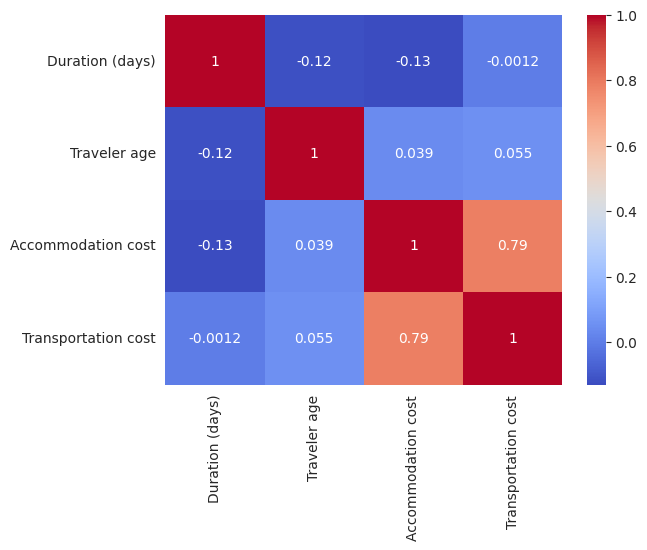

In [32]:
numeric_columns = travel.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Traveler gender', ylabel='Traveler age'>

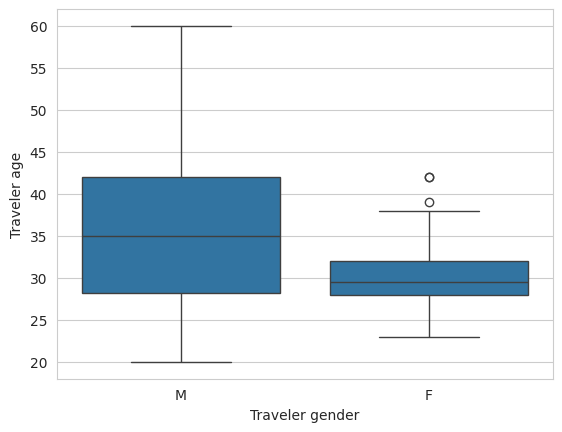

In [33]:
sns.boxplot(data=travel,x='Traveler gender',y='Traveler age')

In [34]:
travel.groupby('Traveler gender')['Traveler age'].agg(['mean','max','min'])

,mean,max,min
Traveler gender,,,
F,30.328571,42.0,23.0
M,36.075758,60.0,20.0


In [35]:
#Most visited Country
travel['Destination Country'].value_counts().sort_values(ascending=False).head(5)

Destination Country
France       15
Australia    13
Japan        13
Indonesia    12
Thailand     12
Name: count, dtype: int64

In [36]:
#Five most visited city
travel.groupby(['Destination Country'])['Destination City'].value_counts().sort_values(ascending=False).head(5)

Destination Country  Destination City
France               Paris               14
Australia            Sydney              12
Indonesia            Bali                12
Japan                Tokyo               12
USA                  New York             8
Name: count, dtype: int64

Text(0.5, 1.0, 'Most preferred months to Travel')

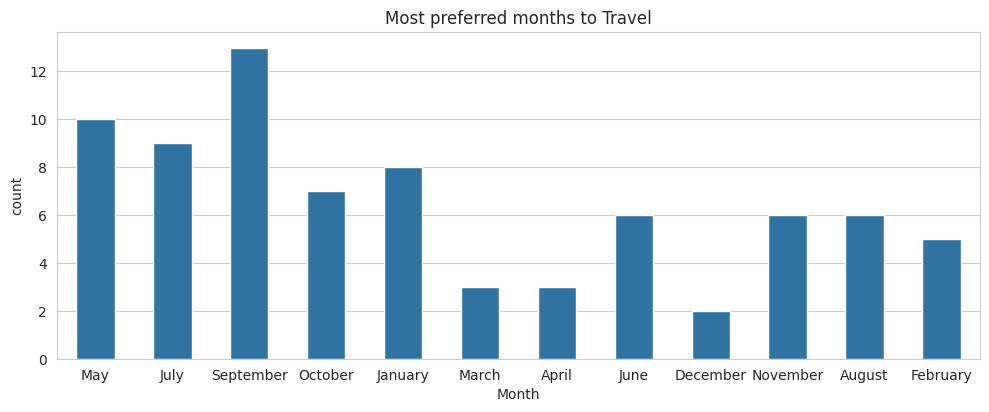

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(data=travel,x='Month',width=0.5)
plt.tight_layout()
plt.title('Most preferred months to Travel')

Text(0.5, 1.0, 'Top10 costliest countries (in terms of Accommodation)')

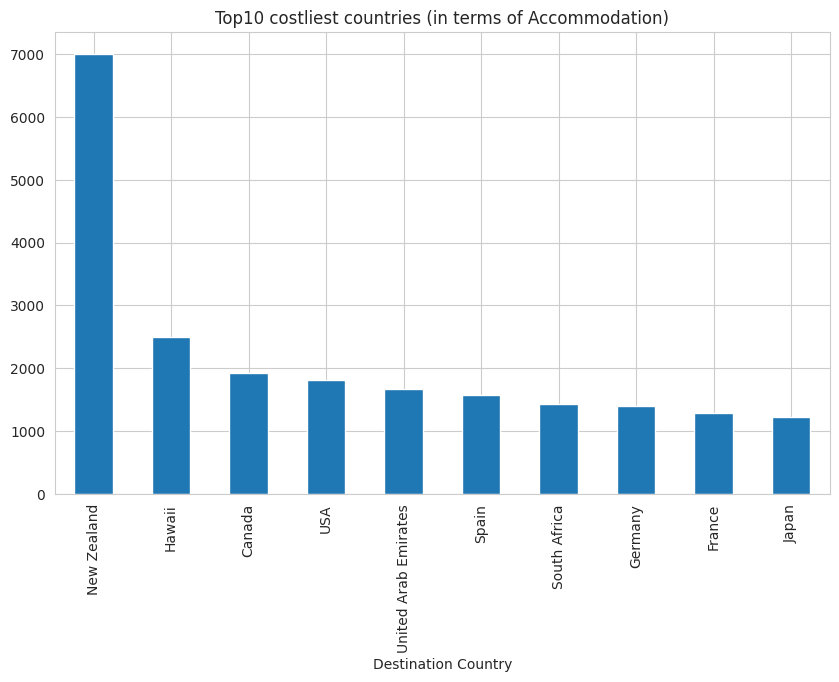

In [38]:
plt.figure(figsize=(10,6))
travel.groupby('Destination Country')['Accommodation cost'].agg('mean').nlargest(10).plot(kind='bar')
plt.title('Top10 costliest countries (in terms of Accommodation)')

Transportation type
Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Name: count, dtype: int64


Text(0.5, 1.0, 'Transportation Types')

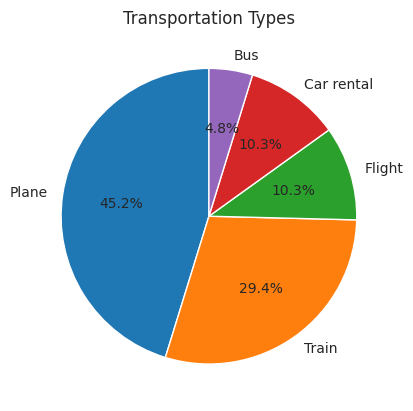

In [39]:
#top 5 preferred way to travel
a=travel['Transportation type'].value_counts().sort_values(ascending=False).head(5)
print(a)
a.plot(kind='pie',autopct='%0.1f%%',startangle=90)
plt.ylabel('')
plt.title('Transportation Types')

Accommodation type
Hotel     59
Airbnb    30
Hostel    24
Resort    14
Villa      4
Name: count, dtype: int64


Text(0.5, 1.0, 'Accommodation Types')

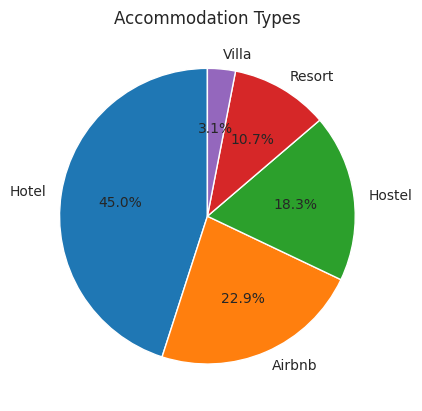

In [40]:
#top 5 preferred accommodation
a=travel['Accommodation type'].value_counts().sort_values(ascending=False).head(5)
print(a)
a.plot(kind='pie',autopct='%0.1f%%',startangle=90)
plt.ylabel('')
plt.title('Accommodation Types')

Destination Country
France       15
Japan        13
Australia    13
Indonesia    12
Thailand     12
Name: count, dtype: int64


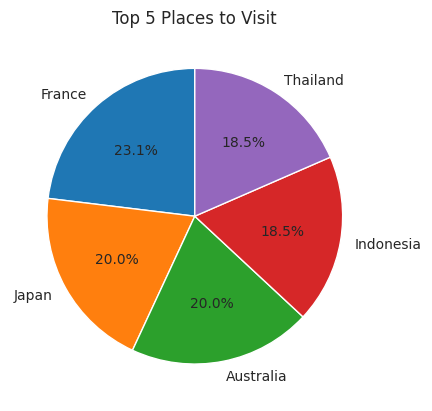

In [53]:
# Extracting the top 5 places to visit
top_places = travel['Destination Country'].value_counts().head(5)
print(top_places)

# Plotting a pie chart
top_places.plot(kind='pie', autopct='%0.1f%%', startangle=90)
plt.ylabel('')
plt.title('Top 5 Places to Visit')
plt.show()